In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Datos MOONS

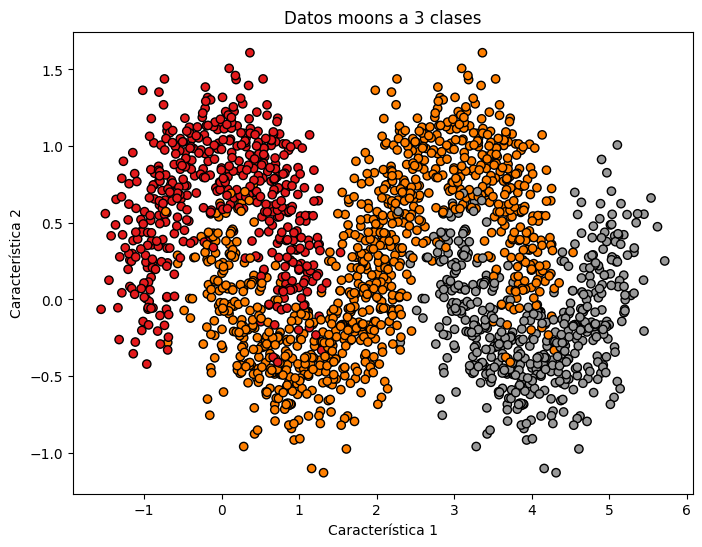

In [2]:
# Datos sintéticos de make_moons (2 clases)
X1, y1 = make_moons(n_samples=1000, noise=0.25, random_state=42)
X2, y2 = make_moons(n_samples=1000, noise=0.25, random_state=42)

# Crear tercera clase recorriendo coordenadas para la mitad de los datos y creando nueva etiqueta
X2[:, 0] += 3  # aplicar un desplazamiento en eje x
y2 = y2 + 1    # asignar nueva etiqueta

# Combinar los datos
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Representación one-hot
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = one_hot_encoder.fit_transform(y.reshape(-1, 1))


# Visualización inicial
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title('Datos moons a 3 clases')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Estandarizar datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Definir conjuntos de prueba y de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42, stratify=y)


In [3]:
def plot_loss(losses):
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label="Loss")
    plt.title("Perdida por epocas")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

## Funciones de activacion y perdida

In [4]:
#Funcion de perdida
def loss_function(y_hat,y):
    return np.mean((y_hat-y)**2)

#Derivada de la funcion de perdida
def d_loss_function(y_hat,y):
    n = y_hat.shape[0]
    return (2/n)*np.sum(y_hat-y)

#Funcion de activacion 1
def relu(z):
    return np.maximum(z,0)
    
#Derivada de la funcion de activacion 1
def d_relu(z):
    return np.where(z>0,1,0)
    
#Funcion de la funcion activacion 2
def sigmoid(z):
    return 1/(1+np.exp(-z))

def d_sigmoid(a):
    return a*(1-a)


lr = 0.1


## Derivadas parciales con respecto a la funcion de perdida

In [5]:
#Derivada de la perdida respecto a W3
def DL_W3(y_hat,y,a2):
    return a2.T@(y_hat-y)

def DL_W2(y_hat,y,W3,a2,a1):
    return a1.T@((y_hat-y)@W3.T*(d_sigmoid(a2)))

def DL_b2(y_hat,y,W3,a2):
    return np.sum((y_hat-y)@W3.T*(d_sigmoid(a2)))

def DL_W1(y_hat,y,W3,W2,a2,z1,X):
    return X.T@((y_hat-y)@W3.T*(d_sigmoid(a2))@W2.T*d_relu(z1))

def DL_b1(y_hat,y,W3,W2,a2,z1):
    return np.sum((y_hat-y)@W3.T*(d_sigmoid(a2))@W2.T*d_relu(z1))

# Propagacion hacia delante 

In [6]:
def feed_forward(X,W1,W2,W3,b1,b2):
    #Primer capa oculta
    z_1 = X@W1+b1
    a_1 = relu(z_1)
    #SEgunda capa oculta
    z_2 = a_1@W2+b2
    a_2 = sigmoid(z_2)
    #Capa de salida
    y_hat = a_2@W3

    return z_1,a_1,z_2,a_2,y_hat


def backpropagation(X,Y,W1,W2,W3,b1,b2):
    z1,a1,z2,a2,yhat = feed_forward(X,W1,W2,W3,b1,b2)
    
    dW3 = DL_W3(yhat,Y,a2)
    dW2 = DL_W2(yhat,Y,W3,a2,a1)
    db2 = DL_b2(yhat,Y,W3,a2)
    dW1 = DL_W1(yhat,Y,W3,W2,a2,z1,X_train)
    db1 = DL_b1(yhat,Y,W3,W2,a2,z1)

    return dW1,dW2,dW3,db1,db2,yhat


def update_wights(W1,W2,W3,b1,b2,dW1,dW2,dW3,db1,db2,lr):
    
    W1 -= lr*dW1
    b1 -= lr*db1

    W2 -= lr*dW2
    b2 -= lr*db2

    W3 -= lr*dW3  

    # print("PESOS ACTUALES")
    # print(W1)
    # print("")
    # print(W2)
    # print("")
    # print(W3)

    return W1,W2,W3,b1,b2

    
    
    

In [12]:
np.random.seed(123)
#Iniciamos pesos y sesgos aleatorios para la primer capa oculta
W1 = np.random.random(size=(2,8)) 
b1 = np.random.random(size=(1,8)) 
#Pesos y sesgo segunda capa oculta
W2= np.random.random(size=(8,8)) 
b2 = np.random.random(size=(1,8)) 
#Pesos de la ultima capa
W3 = np.random.random(size=(8,3)) 

#Tasa de aprendizaje
lr=0.0001


In [13]:
#Lista para guardar las perdidaas
losses = np.array([])

for i in range(10000):
    dW1,dW2,dW3,db1,db2,yhat = backpropagation(X_train,y_train,W1,W2,W3,b1,b2)

    loss = loss_function(yhat,y_train)
    losses=np.append(losses,loss)
    if i%1000 == 0:
        print(f"Iteracion {i}, perdida {loss}")

    W1,W2,W3,b1,b2 = update_wights(W1,W2,W3,b1,b2,dW1,dW2,dW3,db1,db2,lr)


Iteracion 0, perdida 8.914603952506193
Iteracion 1000, perdida 0.12522212406114078
Iteracion 2000, perdida 0.11943466702618176
Iteracion 3000, perdida 0.1170168503268894
Iteracion 4000, perdida 0.11463698087782938
Iteracion 5000, perdida 0.06402448675606737
Iteracion 6000, perdida 0.061795174227688376
Iteracion 7000, perdida 0.06074389320184092
Iteracion 8000, perdida 0.060117211199491864
Iteracion 9000, perdida 0.059694079305875454


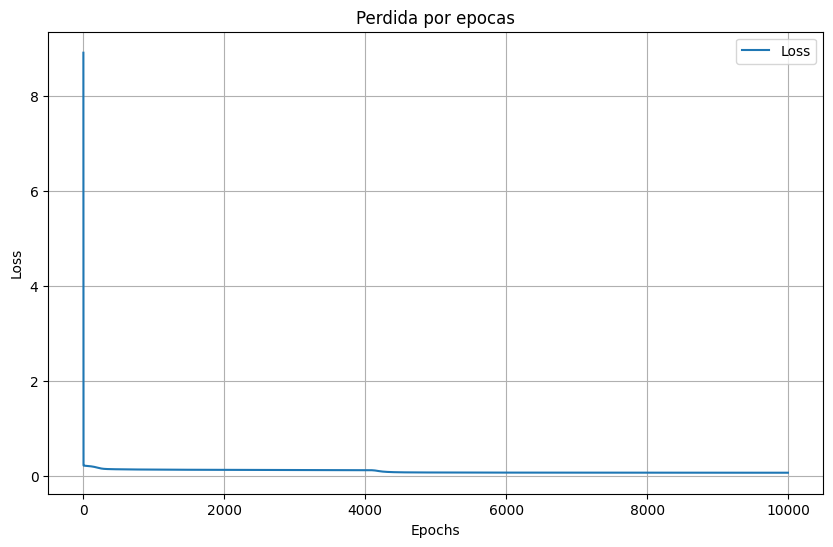

In [14]:
plot_loss(losses)

In [11]:
_,_,_,_,y_hat=feed_forward(X_test,W1,W2,W3,b1,b2)

pred = np.argmax(y_hat,axis=1)
true =  np.argmax(y_test,axis=1)

accuracy = (np.sum(pred==true)/len(true))*100
print(f"{round(accuracy,2)}%")

85.17%
